<a href="https://colab.research.google.com/github/dennismingming/Dynamic-Asset-Allocation/blob/main/TAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


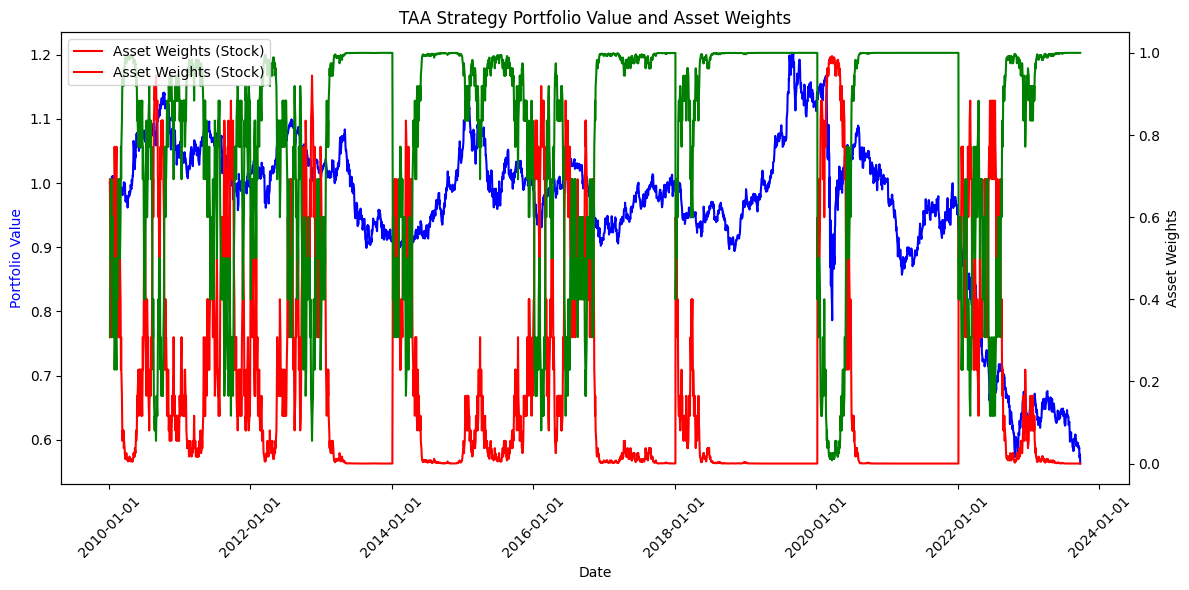

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # 추가 모듈


# Yahoo Finance에서 주식과 채권 데이터 불러오기
start_date = '2010-01-01'
end_date = '2023-09-27'
stock_data = yf.download('SPY', start=start_date, end=end_date)
bond_data = yf.download('TLT', start=start_date, end=end_date)

# 가격 데이터에서 일일 수익률 계산
stock_returns = stock_data['Adj Close'].pct_change().dropna()
bond_returns = bond_data['Adj Close'].pct_change().dropna()

# 날짜 데이터 추출
dates = stock_data.index[1:]  # 날짜 데이터hange().dropna()


# TAA 전략 구현
def taa_strategy(stock_returns, bond_returns, stock_weight_initial, bond_weight_initial, reset_frequency):
    signals = []
    stock_weight = stock_weight_initial
    bond_weight = bond_weight_initial
    reset_counter = 0

    for i in range(len(stock_returns)):
        stock_signal = stock_returns[i] > bond_returns[i]

        if stock_signal:
            # 주식이 더 많으면 주식에 0.8 배, 채권에 1.2 배
            stock_weight *= 0.8
            bond_weight *= 1.2
        else:
            # 채권이 더 많으면 주식에 1.2 배, 채권에 0.8 배
            stock_weight *= 1.2
            bond_weight *= 0.8

        # 주식과 채권의 합을 1로 맞추기
        total_weight = stock_weight + bond_weight
        stock_weight /= total_weight
        bond_weight /= total_weight

        reset_counter += 1
        if reset_counter == reset_frequency:
            # 매년 초에 초기 비율로 돌아오기
            stock_weight = stock_weight_initial
            bond_weight = bond_weight_initial
            reset_counter = 0

        signals.append((stock_weight, bond_weight))

    return signals

# 초기 비율과 매년 초기 비율로 돌아오는 빈도 설정
stock_weight_initial = 0.6  # 초기 주식 비중
bond_weight_initial = 0.4   # 초기 채권 비중
reset_frequency = 252*2  # 252일(약 1년)마다 초기 비율로 돌아오도록 설정

# TAA 전략 시뮬레이션
signals = taa_strategy(stock_returns, bond_returns, stock_weight_initial, bond_weight_initial, reset_frequency)


# 포트폴리오 백테스트
portfolio_value = [1.0]  # 초기 투자금은 1로 설정
for i in range(len(signals)):
    stock_weight, bond_weight = signals[i]
    portfolio_return = stock_weight * stock_returns[i] + bond_weight * bond_returns[i]
    portfolio_value.append(portfolio_value[-1] * (1 + portfolio_return))

# 날짜 포맷 지정
date_format = mdates.DateFormatter("%Y-%m-%d")


# 주식 및 채권 비중 시각화
stock_weights = [signal[0] for signal in signals]
bond_weights = [signal[1] for signal in signals]

plt.figure(figsize=(12, 6))

# 포트폴리오 가치 그래프
plt.gca().xaxis.set_major_formatter(date_format)  # x축에 날짜 포맷 적용
plt.plot(dates, portfolio_value[:-1], label="Portfolio Value", color='blue')
plt.xlabel("Date")
plt.ylabel("Portfolio Value", color='blue')
plt.title("TAA Strategy Portfolio Value and Asset Weights")
plt.xticks(rotation=45)  # x축 라벨 회전 (선택 사항)

# 주식 및 채권 비중 그래프 (두 번째 y축 사용)
ax2 = plt.twinx()
ax2.plot(dates, stock_weights, label="Asset Weights (Stock)", color='red')
ax2.plot(dates, bond_weights, color='green')  # 채권 비중은 범례에 표시하지 않음
ax2.set_ylabel("Asset Weights", color='black')

# 범례 표시
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc="upper left")

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CPIAUCSL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


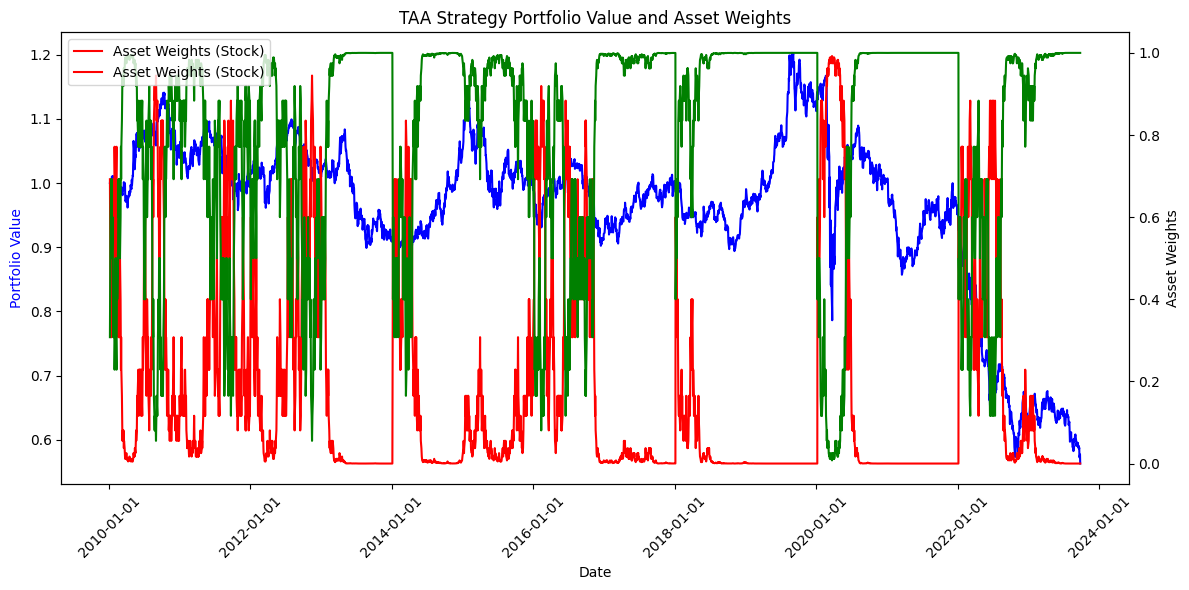

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Yahoo Finance에서 주식과 채권 데이터 불러오기
start_date = '2010-01-01'
end_date = '2023-09-27'
stock_data = yf.download('SPY', start=start_date, end=end_date)
bond_data = yf.download('TLT', start=start_date, end=end_date)

# 가격 데이터에서 일일 수익률 계산
stock_returns = stock_data['Adj Close'].pct_change().dropna()
bond_returns = bond_data['Adj Close'].pct_change().dropna()

# CPI 데이터 불러오기 (미국의 CPI 데이터를 사용)
cpi_data = yf.download('CPIAUCSL', start=start_date, end=end_date)
cpi_returns = cpi_data['Adj Close'].pct_change().dropna()

# TBF 데이터 불러오기 (TBF는 ProShares Short 20+ Year Treasury ETF로 미국 장기 국채의 하락을 추적하는 ETF)
tbf_data = yf.download('TBF', start=start_date, end=end_date)
tbf_returns = tbf_data['Adj Close'].pct_change().dropna()

# 날짜 데이터 추출
dates = stock_data.index[1:]

# TAA 전략 구현
def taa_strategy(stock_returns, bond_returns, stock_weight_initial, bond_weight_initial, reset_frequency):
    signals = []
    stock_weight = stock_weight_initial
    bond_weight = bond_weight_initial
    reset_counter = 0

    for i in range(len(stock_returns)):
        stock_signal = stock_returns[i] > bond_returns[i]

        if stock_signal:
            # 주식이 더 많으면 주식에 0.8 배, 채권에 1.2 배
            stock_weight *= 0.8
            bond_weight *= 1.2
        else:
            # 채권이 더 많으면 주식에 1.2 배, 채권에 0.8 배
            stock_weight *= 1.2
            bond_weight *= 0.8

        # 주식과 채권의 합을 1로 맞추기
        total_weight = stock_weight + bond_weight
        stock_weight /= total_weight
        bond_weight /= total_weight

        reset_counter += 1
        if reset_counter == reset_frequency:
            # 매년 초에 초기 비율로 돌아오기
            stock_weight = stock_weight_initial
            bond_weight = bond_weight_initial
            reset_counter = 0

        signals.append((stock_weight, bond_weight))

    return signals

# 초기 비율과 매년 초기 비율로 돌아오는 빈도 설정
stock_weight_initial = 0.6  # 초기 주식 비중
bond_weight_initial = 0.4   # 초기 채권 비중
reset_frequency = 252*2  # 252일(약 1년)마다 초기 비율로 돌아오도록 설정

# TAA 전략 시뮬레이션
signals = taa_strategy(stock_returns, bond_returns, stock_weight_initial, bond_weight_initial, reset_frequency)

# 포트폴리오 백테스트
portfolio_value = [1.0]  # 초기 투자금은 1로 설정
for i in range(len(signals)):
    stock_weight, bond_weight = signals[i]
    portfolio_return = stock_weight * stock_returns[i] + bond_weight * bond_returns[i]
    portfolio_value.append(portfolio_value[-1] * (1 + portfolio_return))

# 날짜 포맷 지정
date_format = mdates.DateFormatter("%Y-%m-%d")

# 주식 및 채권 비중 시각화
stock_weights = [signal[0] for signal in signals]
bond_weights = [signal[1] for signal in signals]

plt.figure(figsize=(12, 6))

# 포트폴리오 가치 그래프
plt.gca().xaxis.set_major_formatter(date_format)  # x축에 날짜 포맷 적용
plt.plot(dates, portfolio_value[:-1], label="Portfolio Value", color='blue')
plt.xlabel("Date")
plt.ylabel("Portfolio Value", color='blue')
plt.title("TAA Strategy Portfolio Value and Asset Weights")
plt.xticks(rotation=45)  # x축 라벨 회전 (선택 사항)

# 주식 및 채권 비중 그래프 (두 번째 y축 사용)
ax2 = plt.twinx()
ax2.plot(dates, stock_weights, label="Asset Weights (Stock)", color='red')
ax2.plot(dates, bond_weights, color='green')  # 채권 비중은 범례에 표시하지 않음
ax2.set_ylabel("Asset Weights", color='black')

# 범례 표시
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc="upper left")

plt.tight_layout()
plt.show()

In [3]:
dates

DatetimeIndex(['2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26',
               '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01',
               '2010-02-02', '2010-02-03',
               ...
               '2028-07-19', '2028-07-20', '2028-07-21', '2028-07-22',
               '2028-07-23', '2028-07-24', '2028-07-25', '2028-07-26',
               '2028-07-27', '2028-07-28'],
              dtype='datetime64[ns]', length=5523, freq=None)

In [2]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515488,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345764,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722443,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849823,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917053,147217800
...,...,...,...,...,...,...
2023-09-20,444.010010,444.440002,438.429993,438.640015,438.640015,82562600
2023-09-21,435.700012,435.970001,431.230011,431.390015,431.390015,103976100
2023-09-22,432.450012,434.100006,429.989990,430.420013,430.420013,100757900
